# Introduction and Objective

Receiving spam emails is a common problem that affects the majority of people and can greatly affect businesses in a targeted attack. Because of this we are developing a naive bayes machine learning model that can classify emails as spam or ham (not spam), with the intention of preventing spam emails from being seen by recipients.

# Data Analysis

Our dataset comes from Kaggle and includes the following features:
1.Numerical feature that is likely an identifier.
2.label: categorical feature that classifies entry as spam or ham
3.text: Text feature that includes the body text of an email
4.label_num: numerical feature that classifies entry as spam or ham (not spam)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the dataset is a CSV file
# Replace 'your_dataset.csv' with the actual file name or path
df = pd.read_csv('DATA\spam_ham_dataset.csv')

# Displaying the first few rows of the dataset
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Basic Description

Data has 5210 entries and has no holes.

In [2]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (5171, 4)

Data Types:
 Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

Missing Values:
 Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


## Data Distribution

Distribution shows significantly more 0 labels (not spam) than 1 labels (spam)

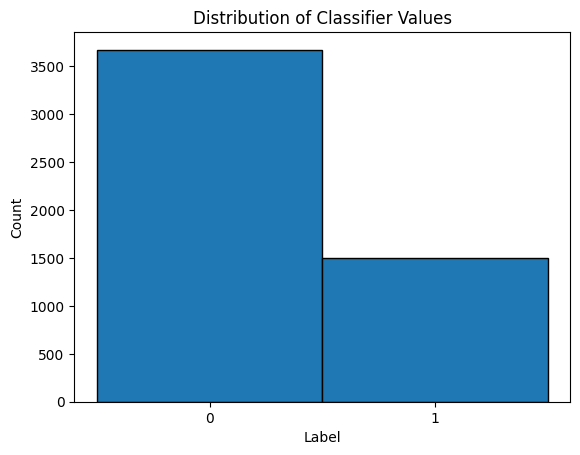

In [3]:
# Plot a histogram
plt.hist(df['label_num'], bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')

# Customize the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Classifier Values')
plt.xticks([0, 1])

# Show the plot
plt.show()

# Data Preprocessing

Drop unnecessary columns

In [4]:
#drop irrelevant columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Clean text by removing emails, new lines, and links

In [5]:
import re
# Define a function to clean the emails
def clean_email(email):
    cleaned_email = re.sub(r'\S*@\S*\s?', '', email)  # Remove email addresses
    cleaned_email = re.sub(r'http\S+', '', cleaned_email)  # Remove URLs
    cleaned_email = re.sub(r'\n', ' ', cleaned_email)  # Remove newlines
    return cleaned_email

# Apply the cleaning function to each email
df['Cleaned_Body'] = df['text'].apply(clean_email)

# Display the first few rows of the DataFrame
df.head()


,text,label_num,Cleaned_Body
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject: enron methanol ; meter # : 988291\r t...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"Subject: hpl nom for january 9 , 2001\r ( see ..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"Subject: neon retreat\r ho ho ho , we ' re aro..."
3,"Subject: photoshop , windows , office . cheap ...",1,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject: re : indian springs\r this deal is to...


tokenize cleaned body by word

In [6]:
import nltk

def tokenize_email(cleaned_email):
    tokens = nltk.word_tokenize(cleaned_email)
    return tokens

# Apply the tokenization function to each cleaned email
df['Tokens'] = df['Cleaned_Body'].apply(tokenize_email)

# Display the first few rows of the DataFrame
df.head()


,text,label_num,Cleaned_Body,Tokens
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject: enron methanol ; meter # : 988291\r t...,"[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"Subject: hpl nom for january 9 , 2001\r ( see ...","[Subject, :, hpl, nom, for, january, 9, ,, 200..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"Subject: neon retreat\r ho ho ho , we ' re aro...","[Subject, :, neon, retreat, ho, ho, ho, ,, we,..."
3,"Subject: photoshop , windows , office . cheap ...",1,"Subject: photoshop , windows , office . cheap ...","[Subject, :, photoshop, ,, windows, ,, office,..."
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject: re : indian springs\r this deal is to...,"[Subject, :, re, :, indian, springs, this, dea..."


Filter token column by removing stop words

In [7]:
from nltk.corpus import stopwords

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from the tokens
def remove_stopwords(token_list):
    filtered_tokens = [word for word in token_list if word not in stop_words]
    return filtered_tokens

# Apply the stopword removal function to each list of tokens
df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

# Display the first few rows of the DataFrame
df.head()


,text,label_num,Cleaned_Body,Tokens,Filtered_Tokens
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject: enron methanol ; meter # : 988291\r t...,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"Subject: hpl nom for january 9 , 2001\r ( see ...","[Subject, :, hpl, nom, for, january, 9, ,, 200...","[Subject, :, hpl, nom, january, 9, ,, 2001, (,..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"Subject: neon retreat\r ho ho ho , we ' re aro...","[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[Subject, :, neon, retreat, ho, ho, ho, ,, ', ..."
3,"Subject: photoshop , windows , office . cheap ...",1,"Subject: photoshop , windows , office . cheap ...","[Subject, :, photoshop, ,, windows, ,, office,...","[Subject, :, photoshop, ,, windows, ,, office,..."
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject: re : indian springs\r this deal is to...,"[Subject, :, re, :, indian, springs, this, dea...","[Subject, :, :, indian, springs, deal, book, t..."


In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define functions for stemming and lemmatizing
def stem_tokens(token_list):
    return [stemmer.stem(word) for word in token_list]

def lemmatize_tokens(token_list):
    return [lemmatizer.lemmatize(word) for word in token_list]

# Apply stemming and lemmatization to the filtered tokens
df['Stemmed_Tokens'] = df['Filtered_Tokens'].apply(stem_tokens)
df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

# Display the first few rows of the DataFrame
df.head()


,text,label_num,Cleaned_Body,Tokens,Filtered_Tokens,Stemmed_Tokens,Lemmatized_Tokens
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject: enron methanol ; meter # : 988291\r t...,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"Subject: hpl nom for january 9 , 2001\r ( see ...","[Subject, :, hpl, nom, for, january, 9, ,, 200...","[Subject, :, hpl, nom, january, 9, ,, 2001, (,...","[subject, :, hpl, nom, januari, 9, ,, 2001, (,...","[Subject, :, hpl, nom, january, 9, ,, 2001, (,..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"Subject: neon retreat\r ho ho ho , we ' re aro...","[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[Subject, :, neon, retreat, ho, ho, ho, ,, ', ...","[subject, :, neon, retreat, ho, ho, ho, ,, ', ...","[Subject, :, neon, retreat, ho, ho, ho, ,, ', ..."
3,"Subject: photoshop , windows , office . cheap ...",1,"Subject: photoshop , windows , office . cheap ...","[Subject, :, photoshop, ,, windows, ,, office,...","[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, window, ,, offic, ....","[Subject, :, photoshop, ,, window, ,, office, ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject: re : indian springs\r this deal is to...,"[Subject, :, re, :, indian, springs, this, dea...","[Subject, :, :, indian, springs, deal, book, t...","[subject, :, :, indian, spring, deal, book, te...","[Subject, :, :, indian, spring, deal, book, te..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# [Previous steps: cleaning, tokenizing, removing stopwords, stemming, lemmatizing]

# Aggregate lemmatized tokens back into strings
df['Lemmatized_Text'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer and TfidfVectorizer
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Apply CountVectorizer to the lemmatized text
bow = vectorizer.fit_transform(df['Lemmatized_Text'])

# Apply TfidfVectorizer to the lemmatized text
tfidf = tfidf_vectorizer.fit_transform(df['Lemmatized_Text'])

# The resulting bow and tfidf are the vectorized forms of the processed emails
# To display an example of the Bag of Words representation:
print("\nBag of Words Representation (Example):\n", bow.toarray()[0])  # Display the first row

# Optionally, you can create DataFrame representations for easy viewing
bow_df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the BoW DataFrame
bow_df.head()

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()



Bag of Words Representation (Example):
 [1 0 0 ... 0 0 0]


,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0.106357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


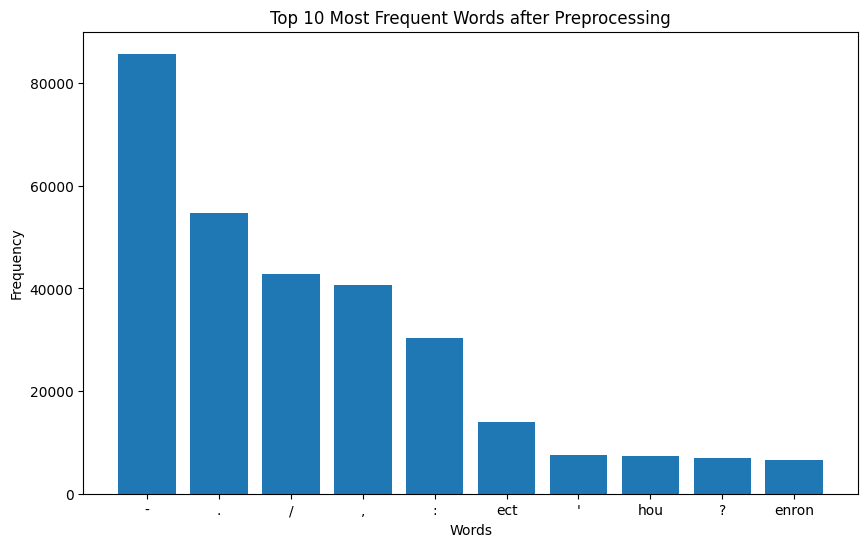

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter

# Aggregate all lemmatized words into a single list
all_lemmatized_words = []
for tokens in df['Lemmatized_Tokens']:
    all_lemmatized_words.extend(tokens)

# Calculate the frequency of each word
word_freq = Counter(all_lemmatized_words)

# Get the 10 most common words
most_common_words = word_freq.most_common(10)

# Unzip words and counts
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words after Preprocessing')
plt.show()


# Analytical Model Description

Given our problem involves language processing we decided to use a Naive Bayes model for our classification task. This is because Naive Bayes models are both computationally efficient and allow for a high dimensionality of features which is common in language processing where each word is considered a feature. The essence of Naive Bayes models involves calculating the likelyhood of each feature given each class and then using that to classify new features. In more formal terms....

We start with intial probability which is calculated with


<span style="white-space: nowrap; font-size: larger;">
    \( P(\text{Class}) = \frac{\text{Number of Instances in Class}}{\text{Total Number of Instances}} \)
</span>

We then calculate the lileyhood of each feature given each class, this is done with

<span style="white-space: nowrap; font-size: larger;">
    \( P(\text{Feature} | \text{Class}) = \frac{\text{Total number of instances in Class}}{\text{Number of instances in Class with the Feature}} \)
</span>


Once we have the likelyhoods of each feature given each class and the initial probability we can classify new entries by calculating the posterior probability of each class given initial probability and the entrie's data. This is done with

<span style="white-space: nowrap; font-size: larger;">
    \( P(\text{Class} | \text{Features}) \propto P(\text{Class}) \cdot \prod_{i} P(\text{Feature}_i | \text{Class}) \)
</span>


We then normalize the posterior probability of each class to ensure that the sum is 1, the new entry is classified based on which class yielded the higher posterior probability. Normalization is done with

<span style="white-space: nowrap; font-size: larger;">
    \( P(\text{Class} | \text{Features}) = \frac{P(\text{Class | Features})}{\sum_{\text{Classes}} P(\text{Class | Features})} \)
</span>


# Pipeline

Our pipeline consisted of:
1. Data Collection: imported an existing dataset from Kaggle
2. Data Exploration: performed initial analysis on data to gain a better understanding
3. Data Preprocessing: cleaned up data and made it suitable for training
4. Model Selection: chose appropiate model based on nature of problem and data
5. Model Training: trained our model with our training data
6. Model Testing: tested our model with our testing set
7. Model Optimization: ensured model performance is as good as possible
8. Performance Analysis: measured our model with various metrics to ensure its performance is optimal

# Model Implementation

In order to implement the model we used pandas to load in the data, sklearn to build the model, matplotlib to visualize the data, and numpy for mathematical computations

# Assumptions

In terms of assumptions, the Naive Bayes inherently assumes that each variable is independent of one another given the class. Although features aren't always independent of eachother, this assumption generally works well. It is also important to note that this model is trained with previous characteristics of spam emails and future spam emails may have different characteristics. For this reason it's important to note that the model must be reevaluated periodically to ensure data is relevant.

# Deployment

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
# Assuming 'df' is your DataFrame and it has been loaded correctly with 'text' and 'label_num' columns

# Splitting the data into features and target variable
X = df['Lemmatized_Text']  # The 'text' column contains the email content
y = df['label_num']  # The 'label_num' column contains the label (0 or 1)


# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, X_train and y_train are your training features and labels
# X_test and y_test are your testing features and labels

# extract features
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(3619, 227394)

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

# Execution 

Upon execution of our model we could see that it yielded a high accuracy of 98% and looking at the ROC curve we confirm that our model is significantly better than performing random guesses on each entry.

Accuracy: 98.51804123711341 %
Cross-Validation Accuracy: 0.9760 (+/- 0.0045)


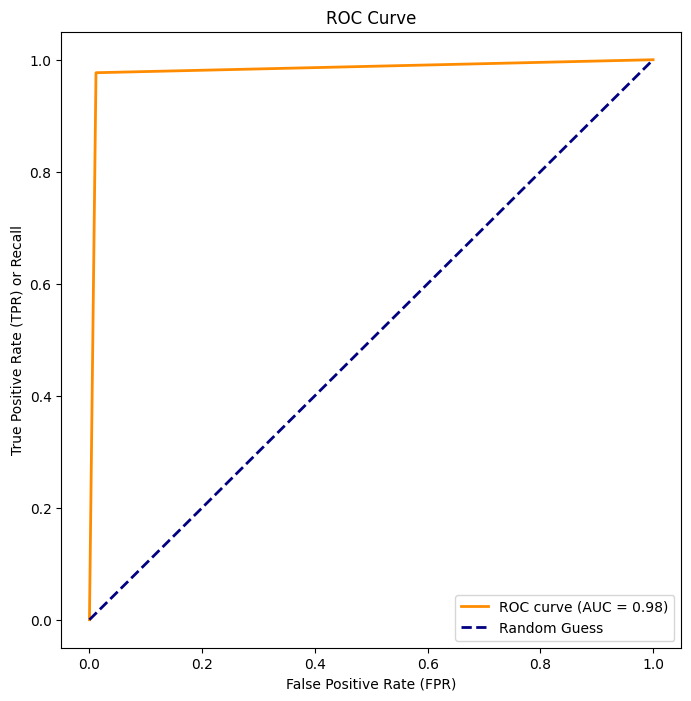

In [15]:
from sklearn.metrics import roc_curve, auc

predictions = model.predict(vectorizer.transform(X_test))
print("Accuracy:", 100 * sum(predictions == y_test) / len(predictions), '%')

# Choose the number of folds (e.g., 5 for 5-fold cross-validation)
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(model, X_train_vectorized, y_train, cv=kf, scoring='accuracy')

#print cross validation result
print(f'Cross-Validation Accuracy: {cross_val_results.mean():.4f} (+/- {cross_val_results.std():.4f})')

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Error Estimation

To further confirm our models excellent performance we looked at the precision, recall, and confusion matrix to determine the error. With a precision of 97% we can confirm that our model is very accurate when predicting positive and a recall of 97% indicates that our model is capturing a majority of the positive cases. This could be visualized with the confusion matrix where the number of true positives and negatives greatly outweigh the number of false positives and negatives.

Precision: 0.9700
Recall: 0.9768


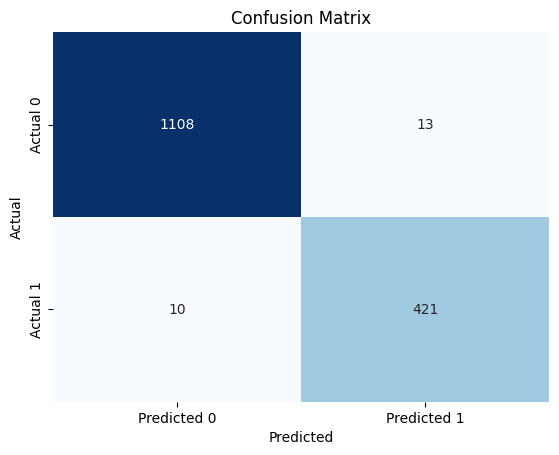

In [20]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix


# Calculate precision and recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
# Visualize confusion matrix with heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Validation

In order to validate the model we split the training set into a 70/30 ratio to have a good percentage of our data act as a testing set. We also used cross validation to ensure that our model generalizes well to different chunks of our data. After having our model predict the testing set, we used metrics like ROC/AUC to quantify how much better our model is than just guessing and precision, recall, and confusion to determine the error of the model. In combination these metrics/methods ensured that we are properly measuring different aspects of our model.

# Results

In terms of results...
Accuracy: 0.98
Cross Validation Mean Accuracy: 0.97
AUC = 0.98
Precision = 0.97
Recall = 0.97

# Analysis

Putting everything together we can confidently say that our model is very accurate at distinguishing between spam emails and non spam emails. We are able to say this because the accuracy and mean cross validation accuracy indicate that the model is both good at generalizing as well as predicting. Looking at the ROC and AUC confirms that the model possesses a strong ability to distinguish between the two classes. Precision and recall also confirm that the model is both accurately making positive predictions and capturing the majority of true positives.

# Model Improvement

There isn't much room for improvement in terms of accuracy/performance as our model is performing very well. Although our model performs well the efficiency/computation time isn't the greatest, especially in the text processing steps we take. We can improve this by better filtering our text in attempt to reduce the dimensionality of the training features, thus leading to a more computation/time efficient model. Although with our current dataset the problem isn't as pronounced, if we were to work with a substantially larger dataset the computation time for preprocessing would likely increase significantly.

# Conclusion

As stated before receiving spam emails is a common occurrence so being able to automatically detect them is great for both user experience and company security. We've developed a naive bayes model that intends to detect spam emails by looking at the contents of the email (after preprocessing) and it performs very well (as explained in the analysis/results section). The success of our model confirms that naive bayes models are not only suitable for spam email classification but potentially other text related data.